In [1]:
import pandas as pd

In [2]:
data0 = pd.read_csv("Northwind.csv")
data0

,order_id,customer_id,order_date,ship_country,unit_price,quantity,discount,category_id,product_id,order_size,season
0,10248,VINET,1996-07-04,France,14.00,12,0.00,4,11,168.000,Summer
1,10248,VINET,1996-07-04,France,9.80,10,0.00,5,42,98.000,Summer
2,10248,VINET,1996-07-04,France,34.80,5,0.00,4,72,174.000,Summer
3,10249,TOMSP,1996-07-05,Germany,18.60,9,0.00,7,14,167.400,Summer
4,10249,TOMSP,1996-07-05,Germany,42.40,40,0.00,7,51,1696.000,Summer
...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,RATTC,1998-05-06,USA,33.25,2,0.03,5,64,64.505,Spring
2151,11077,RATTC,1998-05-06,USA,17.00,1,0.00,2,66,17.000,Spring
2152,11077,RATTC,1998-05-06,USA,15.00,2,0.01,8,73,29.700,Spring
2153,11077,RATTC,1998-05-06,USA,7.75,4,0.00,1,75,31.000,Spring


In [3]:
data = pd.read_csv("question3.csv")
data

,product_id,product_name,category_name,category_id,order_id,unit_price,quantity,discount,order_date,customer_id
0,11,Queso Cabrales,Dairy Products,4,10248,14.00,12,0.00,1996-07-04,VINET
1,42,Singaporean Hokkien Fried Mee,Grains/Cereals,5,10248,9.80,10,0.00,1996-07-04,VINET
2,72,Mozzarella di Giovanni,Dairy Products,4,10248,34.80,5,0.00,1996-07-04,VINET
3,14,Tofu,Produce,7,10249,18.60,9,0.00,1996-07-05,TOMSP
4,51,Manjimup Dried Apples,Produce,7,10249,42.40,40,0.00,1996-07-05,TOMSP
...,...,...,...,...,...,...,...,...,...,...
2150,64,Wimmers gute Semmelknödel,Grains/Cereals,5,11077,33.25,2,0.03,1998-05-06,RATTC
2151,66,Louisiana Hot Spiced Okra,Condiments,2,11077,17.00,1,0.00,1998-05-06,RATTC
2152,73,Röd Kaviar,Seafood,8,11077,15.00,2,0.01,1998-05-06,RATTC
2153,75,Rhönbräu Klosterbier,Beverages,1,11077,7.75,4,0.00,1998-05-06,RATTC


In [4]:
# Kategorisel Harcama Matrisi

data['spend'] = data['unit_price'] * data['quantity'] * (1 - data['discount'])
category_spend = data.groupby(['customer_id', 'category_name'])['spend'].sum().unstack(fill_value=0)


In [5]:
# Her müşterinin her kategoride ne kadar harcadığını gösterir.
category_spend

category_name,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
customer_id,,,,,,,,
ALFKI,553.500,1338.80,0.0000,1255.00,0.00,0.000,604.2000,521.50
ANATR,60.000,0.00,64.4000,1078.80,70.00,0.000,69.7500,60.00
ANTON,1759.000,68.00,958.9275,2182.70,367.75,1522.000,0.0000,165.60
AROUT,1227.000,0.00,4807.7000,2174.25,2128.00,1094.400,1060.0000,899.30
BERGS,8298.675,1066.40,4190.6975,2724.00,175.00,2258.505,2515.2000,3699.10
...,...,...,...,...,...,...,...,...
WARTH,1600.400,1120.00,462.3000,4856.11,2393.00,3220.780,969.6125,1026.50
WELLI,1760.150,124.80,551.7600,783.75,194.00,1789.800,0.0000,863.94
WHITC,8884.700,4174.13,3714.1250,3297.70,577.60,3707.950,182.4000,2825.00


In [32]:

data['new_product_purchase'] = 0  # Başlangıçta 0 olarak atadık (satın almadı)
data.loc[data['product_id'] == 'new_product_id', 'new_product_purchase'] = 1  # Burada yeni ürün ID'sini kontrol ediyoruz

# Yeni ürün satın alma durumunu hedef değişken olarak kullanalım
new_product_purchase = data.groupby('customer_id')['new_product_purchase'].max()  # Müşteri bazında

In [62]:
from sklearn.model_selection import train_test_split

X = category_spend  # Kategorilerdeki harcama miktarları
y = new_product_purchase  # Yeni ürünü satın alma durumu (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(71, 8) (18, 8) (71,) (18,)


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [63]:
# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Modeli oluşturma
model = Sequential()

# Girdi katmanı
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # X_train.shape[1] = özellik sayısı

# Ara katman
model.add(Dense(units=64, activation='relu'))

/Users/elifdy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# Dropout (overfitting'i engellemek için)
model.add(Dropout(0.5))

# Çıktı katmanı (binary classification için sigmoid aktivasyon)
model.add(Dense(units=1, activation='sigmoid'))

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_scaled, y_train, epochs=5, batch_size=32, validation_data=(scaler.transform(X_test), y_test))

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2361 - loss: 0.8426 - val_accuracy: 0.5000 - val_loss: 0.7341
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5020 - loss: 0.7314 - val_accuracy: 0.6667 - val_loss: 0.6556
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8077 - loss: 0.6446 - val_accuracy: 1.0000 - val_loss: 0.5868
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7991 - loss: 0.6230 - val_accuracy: 1.0000 - val_loss: 0.5263
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9445 - loss: 0.5144 - val_accuracy: 1.0000 - val_loss: 0.4734


In [65]:
# Modelin test seti üzerindeki doğruluğunu değerlendirme
test_loss, test_acc = model.evaluate(scaler.transform(X_test), y_test)
print("Test Accuracy:", test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.4734

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.4734
Test Accuracy: 1.0


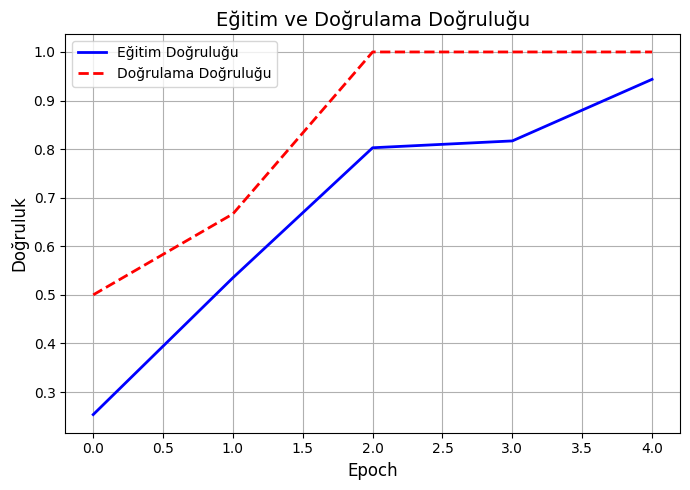

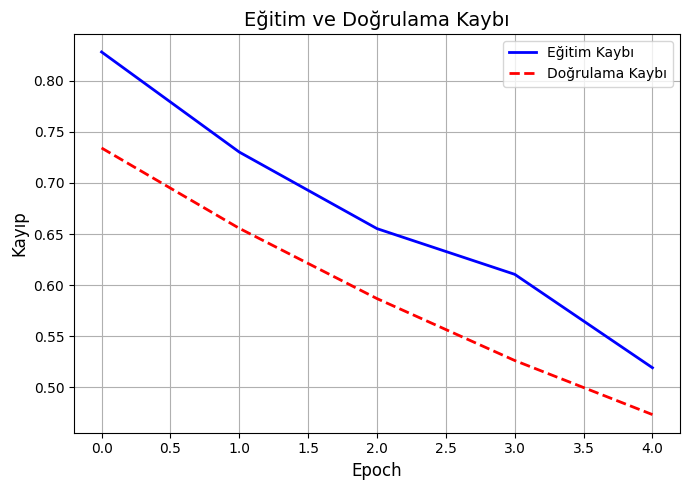

In [68]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', color='b', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', color='r', linestyle='--', linewidth=2)
plt.title('Eğitim ve Doğrulama Doğruluğu', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Doğruluk', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Eğitim ve doğrulama kaybını görselleştirme
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='b', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='r', linestyle='--', linewidth=2)
plt.title('Eğitim ve Doğrulama Kaybı', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Kayıp', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
data["total_price"] = data["unit_price"] * data["quantity"]

#özellik mühendisliği
pivot = data.groupby(["customer_id", "category_id"])["total_price"].sum().unstack(fill_value=0)
pivot.reset_index(inplace=True)

In [5]:
# Full connected Neural Network

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
data

,order_id,customer_id,order_date,ship_country,unit_price,quantity,discount,category_id,product_id,order_size,season,total_price
0,10248,VINET,1996-07-04,France,14.00,12,0.00,4,11,168.000,Summer,168.0
1,10248,VINET,1996-07-04,France,9.80,10,0.00,5,42,98.000,Summer,98.0
2,10248,VINET,1996-07-04,France,34.80,5,0.00,4,72,174.000,Summer,174.0
3,10249,TOMSP,1996-07-05,Germany,18.60,9,0.00,7,14,167.400,Summer,167.4
4,10249,TOMSP,1996-07-05,Germany,42.40,40,0.00,7,51,1696.000,Summer,1696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,RATTC,1998-05-06,USA,33.25,2,0.03,5,64,64.505,Spring,66.5
2151,11077,RATTC,1998-05-06,USA,17.00,1,0.00,2,66,17.000,Spring,17.0
2152,11077,RATTC,1998-05-06,USA,15.00,2,0.01,8,73,29.700,Spring,30.0
2153,11077,RATTC,1998-05-06,USA,7.75,4,0.00,1,75,31.000,Spring,31.0


In [12]:
pivot

category_id,customer_id,1,2,3,4,5,6,7,8
0,ALFKI,648.00,1364.0,0.00,1255.0,0.0,0.00,775.20,554.00
1,ANATR,60.00,0.0,64.40,1078.8,70.0,0.00,69.75,60.00
2,ANTON,1862.50,68.0,1128.15,2373.2,377.5,1522.00,0.00,184.00
3,AROUT,1377.00,0.0,5025.50,2205.5,2128.0,1094.40,1060.00,916.10
4,BERGS,9100.05,1092.8,4599.85,2756.0,175.0,2572.45,2652.00,4020.00
...,...,...,...,...,...,...,...,...,...
84,WARTH,1640.00,1120.0,470.30,5325.8,2716.0,3225.25,1024.25,1095.50
85,WELLI,1799.00,124.8,573.30,825.0,212.0,1945.00,0.00,1001.60
86,WHITC,9168.00,4965.1,3787.10,3493.5,722.0,3775.00,228.00,2934.75
87,WILMK,582.00,753.0,562.75,702.0,84.0,120.00,136.80,220.80


In [ ]:
# Özellik ve hedef ayrımı
X = pivot.drop("customer_id", axis=1)
Y = Y = all_customers.isin(seafood_customers).astype(int).values

In [9]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(Ellipsis, dtype=object)` instead.

In [ ]:
# Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(Y_train.shape[1], activation='sigmoid')  # sigmoid for multi-label
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(X_test) > 0.5  # threshold
print(classification_report(Y_test, Y_pred))
